In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.set_option("mode.copy_on_write", True)

In [2]:
# Load cleaned merged dataset(population, mortality, ARCOS).
final_merged = pd.read_csv(r"C:\Users\rmous\Downloads\final_merged.csv")
final_merged.head()

,State,County,Total_MME,County.1,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,year,Population
0,GA,APPLING,5201.267675,"Appling County, GA",13001,All other non-drug and non-alcohol causes,O9,215,2015,18423
1,GA,ATKINSON,1023.390277,"Atkinson County, GA",13003,All other non-drug and non-alcohol causes,O9,81,2015,8340
2,GA,BACON,3824.818008,"Bacon County, GA",13005,All other non-drug and non-alcohol causes,O9,133,2015,11231
3,GA,BALDWIN,7352.035690,"Baldwin County, GA",13009,All other non-drug and non-alcohol causes,O9,424,2015,45549
4,GA,BANKS,2115.657581,"Banks County, GA",13011,All other non-drug and non-alcohol causes,O9,183,2015,18381


## Pre-Post for Florida — Overdose Rate ##

In [ ]:
# Select Florida (treated unit)
df_fl = final_merged[final_merged["State"] == "FL"].copy()

In [ ]:
# Rate per 100k to adjust for population
df_fl["overdose_rate"] = df_fl["Deaths"] / df_fl["Population"] * 100000

In [ ]:
# Years relative to policy (2010 = 0)
df_fl["relative_year"] = df_fl["year"] - 2010

In [ ]:
# Focus window around the policy (-3 to +2 years)
df_fl_window = df_fl[df_fl["relative_year"].between(-3, 2)]

In [ ]:
# Split into pre/post periods for comparison
df_pre = df_fl_window[df_fl_window["relative_year"].isin([-3, -2, -1])]
df_post = df_fl_window[df_fl_window["relative_year"].isin([0, 1, 2])]

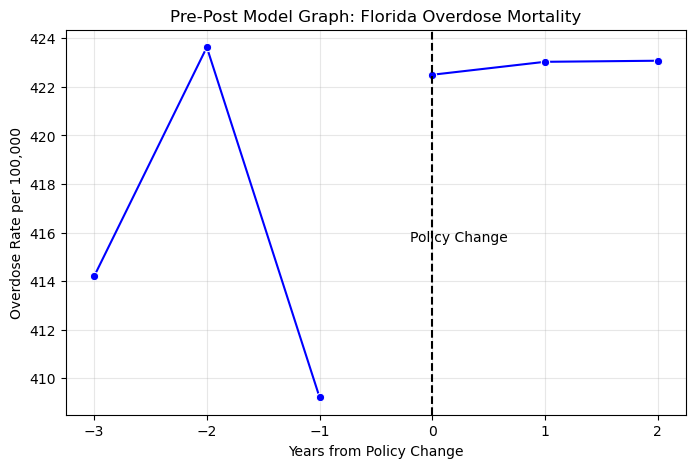

In [ ]:
# Visual check for discontinuity at the policy to assess causal plausibility
plt.figure(figsize=(10, 6))

# PRE line
sns.lineplot(
    data=df_pre,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    errorbar=None,
)

# POST line
sns.lineplot(
    data=df_post,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    errorbar=None,
)

# Policy line at 0
plt.axvline(0, color="black", linestyle="--")

plt.text(-0.2, df_pre["overdose_rate"].mean(), "Policy Change")

plt.xlabel("Years from Policy Change")
plt.ylabel("Overdose Rate per 100,000")
plt.title("Pre-Post Model Graph: Florida Overdose Mortality")

plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Aggregate yearly means to summarize overall county-level trend to check the results
df_year = df_fl.groupby("year", as_index=False)["overdose_rate"].mean()

In [ ]:
df_year = df_year[(df_year["year"] >= 2007) & (df_year["year"] <= 2012)]
df_year = df_year.sort_values("overdose_rate", ascending=False)
df_year

,year,overdose_rate
2,2008,423.630330
6,2012,423.074307
5,2011,423.029678
4,2010,422.496882
1,2007,414.194331
3,2009,409.219707


In [ ]:
# Extend window to check robustness over a longer pre/post horizon
df_fl_window_longer = df_fl[df_fl["relative_year"].between(-5, 4)]

In [ ]:
# Prepare longer pre/post splits for robustness checks
df_pre_long = df_fl_window_longer[
    df_fl_window_longer["relative_year"].isin([-5, -4, -3, -2, -1])
]
df_post_long = df_fl_window_longer[
    df_fl_window_longer["relative_year"].isin([0, 1, 2, 3, 4])
]

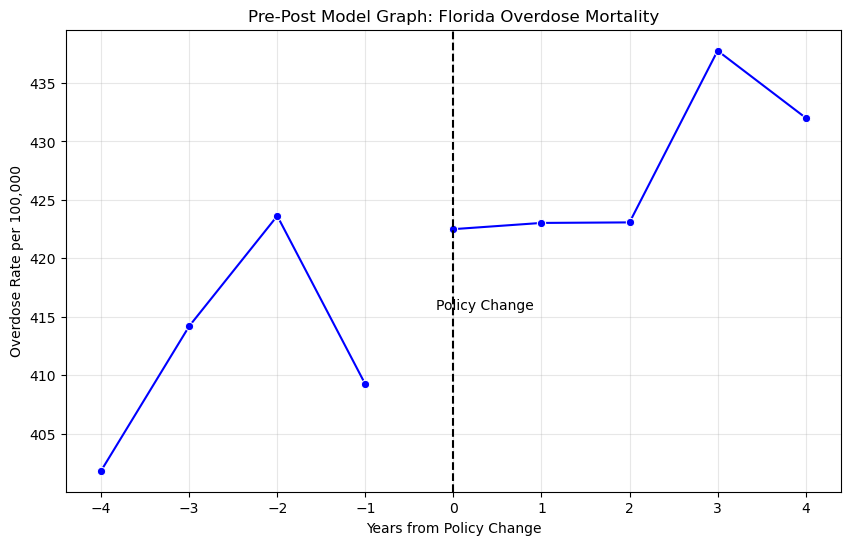

In [ ]:
# Plot extended window to see whether post-policy changes persist over time
plt.figure(figsize=(10, 6))

# PRE line
sns.lineplot(
    data=df_pre_long,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    errorbar=None,
)

# POST line
sns.lineplot(
    data=df_post_long,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    errorbar=None,
)

# Policy line at 0
plt.axvline(0, color="black", linestyle="--")

plt.text(-0.2, df_pre["overdose_rate"].mean(), "Policy Change")

plt.xlabel("Years from Policy Change")
plt.ylabel("Overdose Rate per 100,000")
plt.title("Pre-Post Model Graph: Florida Overdose Mortality")

plt.grid(alpha=0.3)
plt.show()

After extending the pre‐ and post‐policy window to include additional years, the overdose mortality trends still do not show any immediate decline following the 2010 Florida policy. This suggests that, at least in the short run, the regulation did not produce an observable reduction in overdose deaths. As pre–post analysis is descriptive rather than causal, these patterns should be interpreted as contextual evidence rather than proof of policy effectiveness.

## Pre-Post for Florida — Opioid Per Capita ##

In [ ]:
# Normalize opioid shipments to per-person to compare across counties
df_fl["opioid_per_capita"] = df_fl["Total_MME"] / df_fl["Population"]

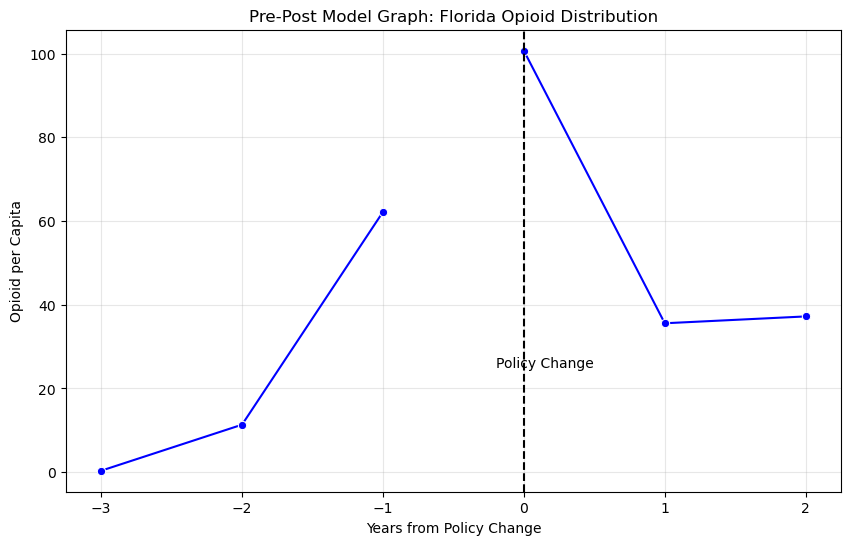

In [ ]:
# Visual check for changes in opioid distribution after the policy
plt.figure(figsize=(10, 6))

# PRE line
sns.lineplot(
    data=df_pre,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="blue",
    errorbar=None,
)

# POST line
sns.lineplot(
    data=df_post,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="blue",
    errorbar=None,
)

# Policy line at 0
plt.axvline(0, color="black", linestyle="--")

plt.text(-0.2, df_pre["opioid_per_capita"].mean(), "Policy Change")

plt.xlabel("Years from Policy Change")
plt.ylabel("Opioid per Capita")
plt.title("Pre-Post Model Graph: Florida Opioid Distribution")
plt.grid(alpha=0.3)
plt.show()

Based on this pre-post plot, opioid per capita in Florida shows a clear upward trend in the years leading up to the 2010 policy, followed by an immediate decline in the year after the policy was implemented. This descriptive pattern suggests a short-run reduction in opioid distribution immediately following the regulation

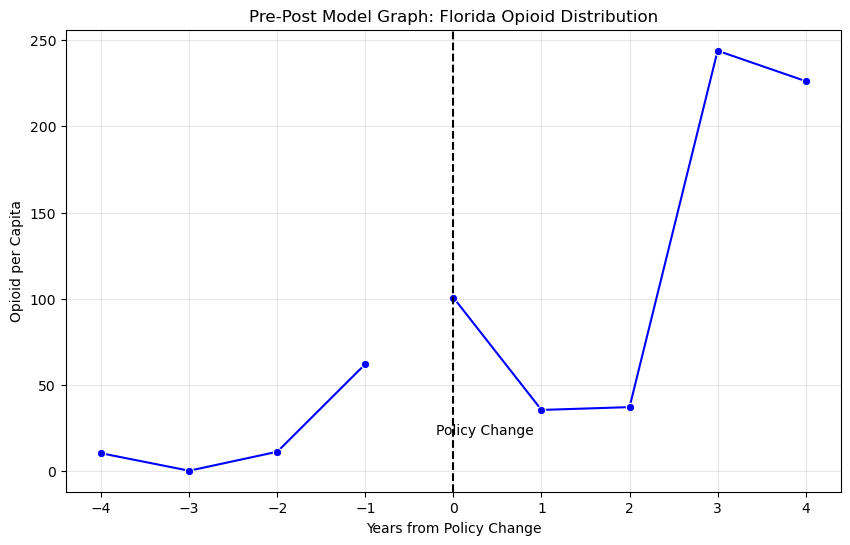

In [ ]:
# Look at the longer-run opioid distribution trends to assess persistence of effects
plt.figure(figsize=(10, 6))

# PRE line
sns.lineplot(
    data=df_pre_long,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="blue",
    errorbar=None,
)

# POST line
sns.lineplot(
    data=df_post_long,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="blue",
    errorbar=None,
)

# Policy line at 0
plt.axvline(0, color="black", linestyle="--")

plt.text(-0.2, df_pre_long["opioid_per_capita"].mean(), "Policy Change")

plt.xlabel("Years from Policy Change")
plt.ylabel("Opioid per Capita")
plt.title("Pre-Post Model Graph: Florida Opioid Distribution")
plt.grid(alpha=0.3)
plt.show()

When extending the pre- and post-policy window to include additional years, the pattern in opioid per-capita distribution becomes more pronounced. Although we observe an immediate decline in the first year following the 2010 policy, this reduction does not persist. Instead, opioid distribution begins to rise again and increases substantially by approximately two to three years after the policy implementation. This suggests that any short-run decrease in opioid supply was temporary, and longer-run trends show a strong rebound in opioid distribution levels. As with any pre-post analysis, these patterns are descriptive rather than causal, but they provide important context for interpreting the subsequent DiD results.